In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../../src")
import analysis.motif_util as motif_util
import plot.plot_motifs as plot_motifs
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pcolors
import matplotlib.font_manager as font_manager

In [2]:
# Plotting defaults
font_files = font_manager.findSystemFonts(fontpaths="/home/tsenga5/lib/fonts")
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plot_params = {
    "figure.titlesize": 22,
    "axes.titlesize": 22,
    "axes.labelsize": 20,
    "legend.fontsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "font.family": "Roboto",
    "font.weight": "bold",
    "svg.fonttype": "none"
}
plt.rcParams.update(plot_params)

### Define paths and constants

In [3]:
base_path = "/projects/site/gred/resbioai/tsenga5/mechint_regnet/"

In [4]:
datasets = [
    "SPI1", "TAL/GATA", "E2F6", "JUND/TEAD", "REST", "SPI1/CTCF"
]

In [5]:
datasets_sanit = {
    dataset_key : dataset_key.replace("/", "_").replace(" ", "").replace("(", "_").replace(")", "").lower()
    for dataset_key in datasets
}

In [6]:
sim_motif_config_paths = {
    "SPI1": [os.path.join(base_path, "data/simulations/configs/spi1_exp_single_config.json")],
    "TAL/GATA": [os.path.join(base_path, "data/simulations/configs/tal_gata_exp_mix_config.json")],
    "E2F6": [os.path.join(base_path, "data/simulations/configs/e2f6_max_exp_coop_config.json"), os.path.join(base_path, "data/simulations/configs/e2f6_max_exp_coop_neg_config.json")],
    "JUND/TEAD": [os.path.join(base_path, "data/simulations/configs/jund_tead_exp_hard_spacing_config.json")],
    "REST": [os.path.join(base_path, "data/simulations/configs/rest_exp_both_config.json"), os.path.join(base_path, "data/simulations/configs/rest_exp_both_neg_config.json")],
    "SPI1/CTCF": [os.path.join(base_path, "data/simulations/configs/spi1_ctcf_exp_repress_config.json"), os.path.join(base_path, "data/simulations/configs/spi1_ctcf_exp_repress_neg_config.json")],
}

In [7]:
figures_out_path = "/home/tsenga5/mechint_regnet/figures/true_simulated_motifs"
os.makedirs(figures_out_path, exist_ok=True)

### Import and plot true motifs

In [8]:
# Import true PFMs
true_pfms = {}
for dataset_key in datasets:
    if dataset_key in sim_motif_config_paths:
        true_pfms[dataset_key] = {}
        motif_files = []
        for config_path in sim_motif_config_paths[dataset_key]:
            with open(config_path, "r") as f:
                motif_config = json.load(f)
                motif_files.extend(motif_config["motif_files"])
        motif_files = list(set(motif_files))
        for motif_file in motif_files:
            true_pfms[dataset_key].update({
                key.rstrip("_exp") : val for key, val in motif_util.import_meme_motifs(motif_file).items()
                if key.endswith("_exp")
            })

In [9]:
# Augment with reverse complements
for dataset_key in datasets:
    rc_dict = {}
    for motif_key, pfm in true_pfms[dataset_key].items():
        rc_dict[motif_key + "_RC"] = np.flip(pfm)
    true_pfms[dataset_key].update(rc_dict)

SPI1


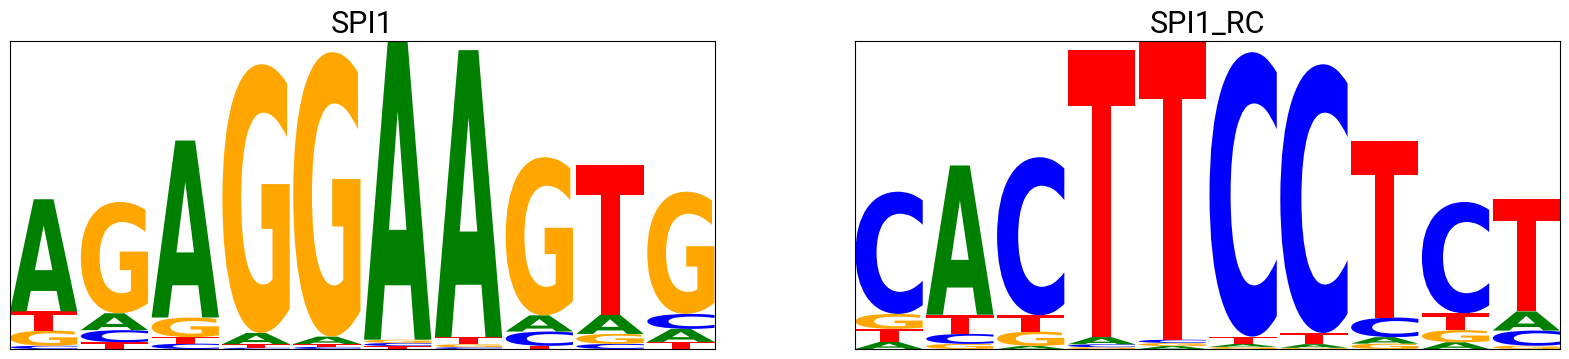

TAL/GATA


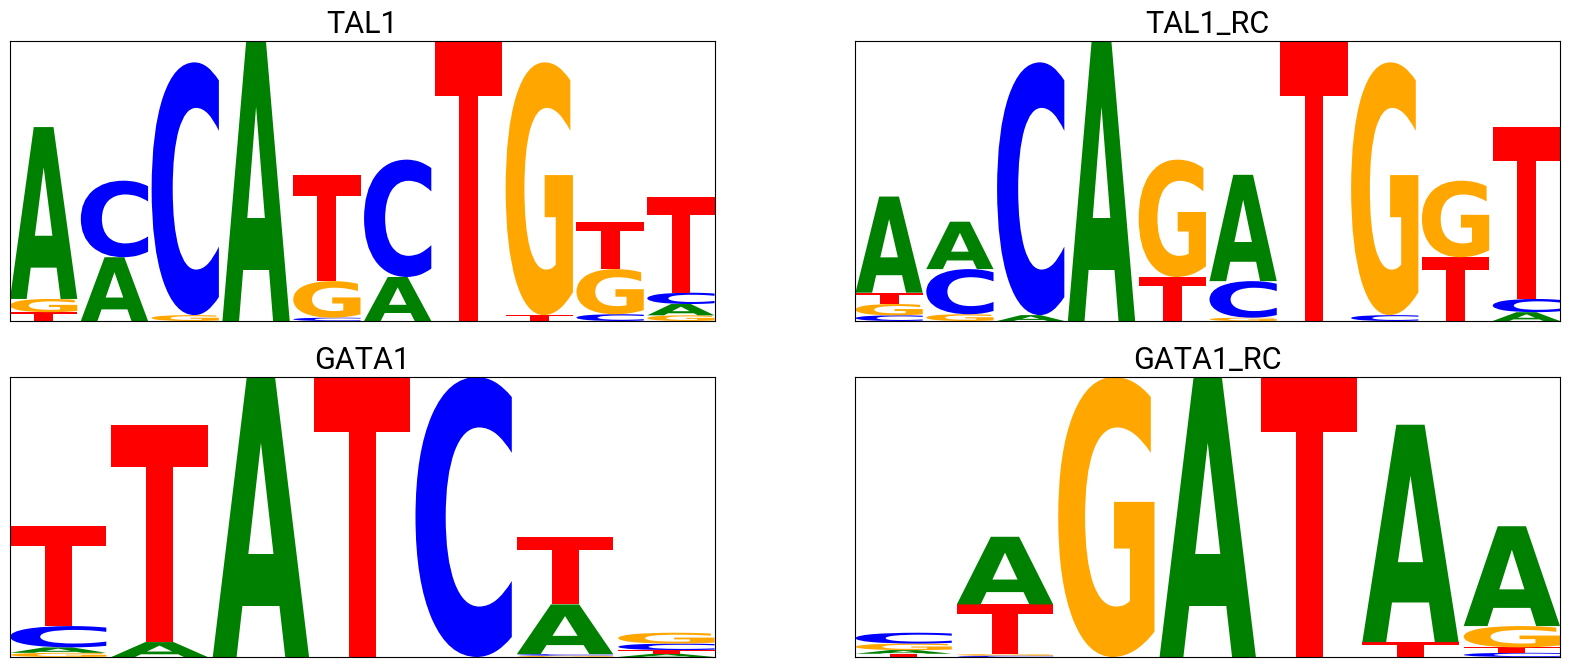

E2F6


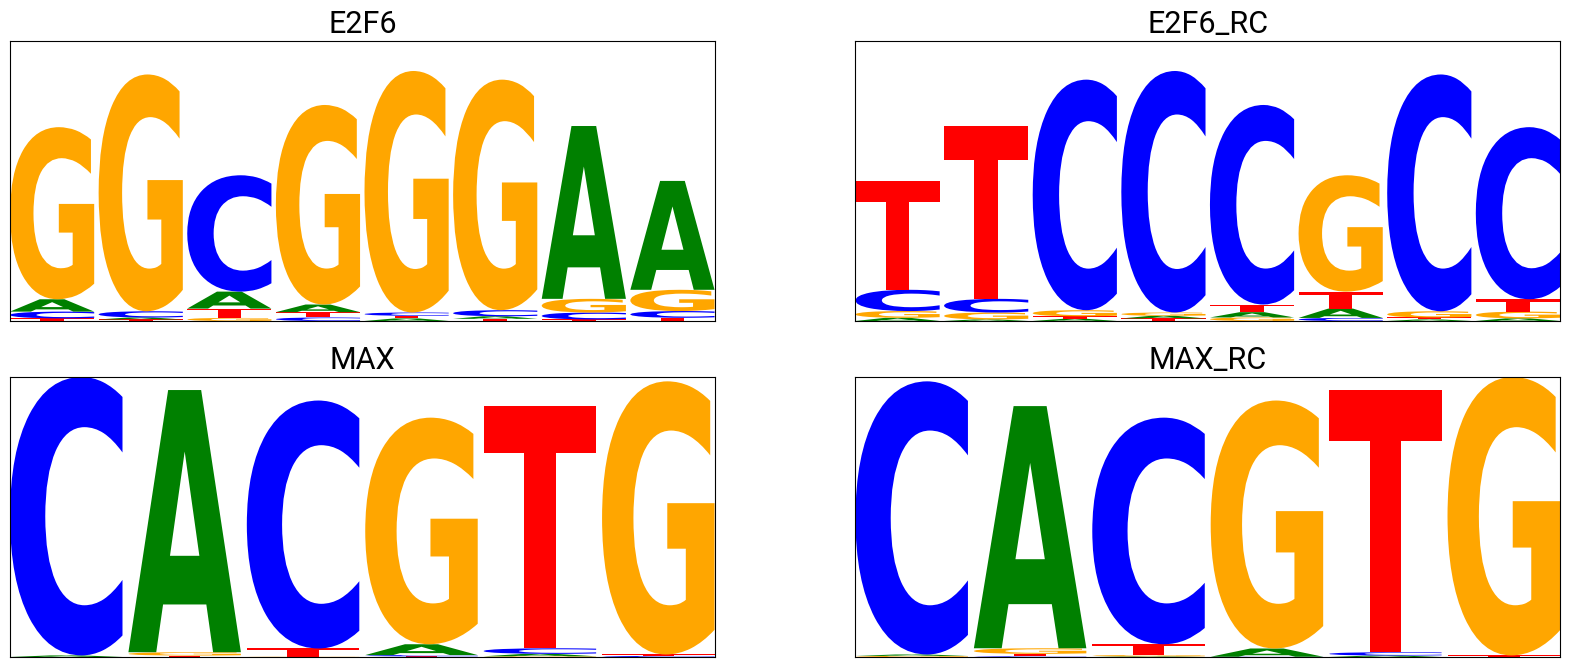

JUND/TEAD


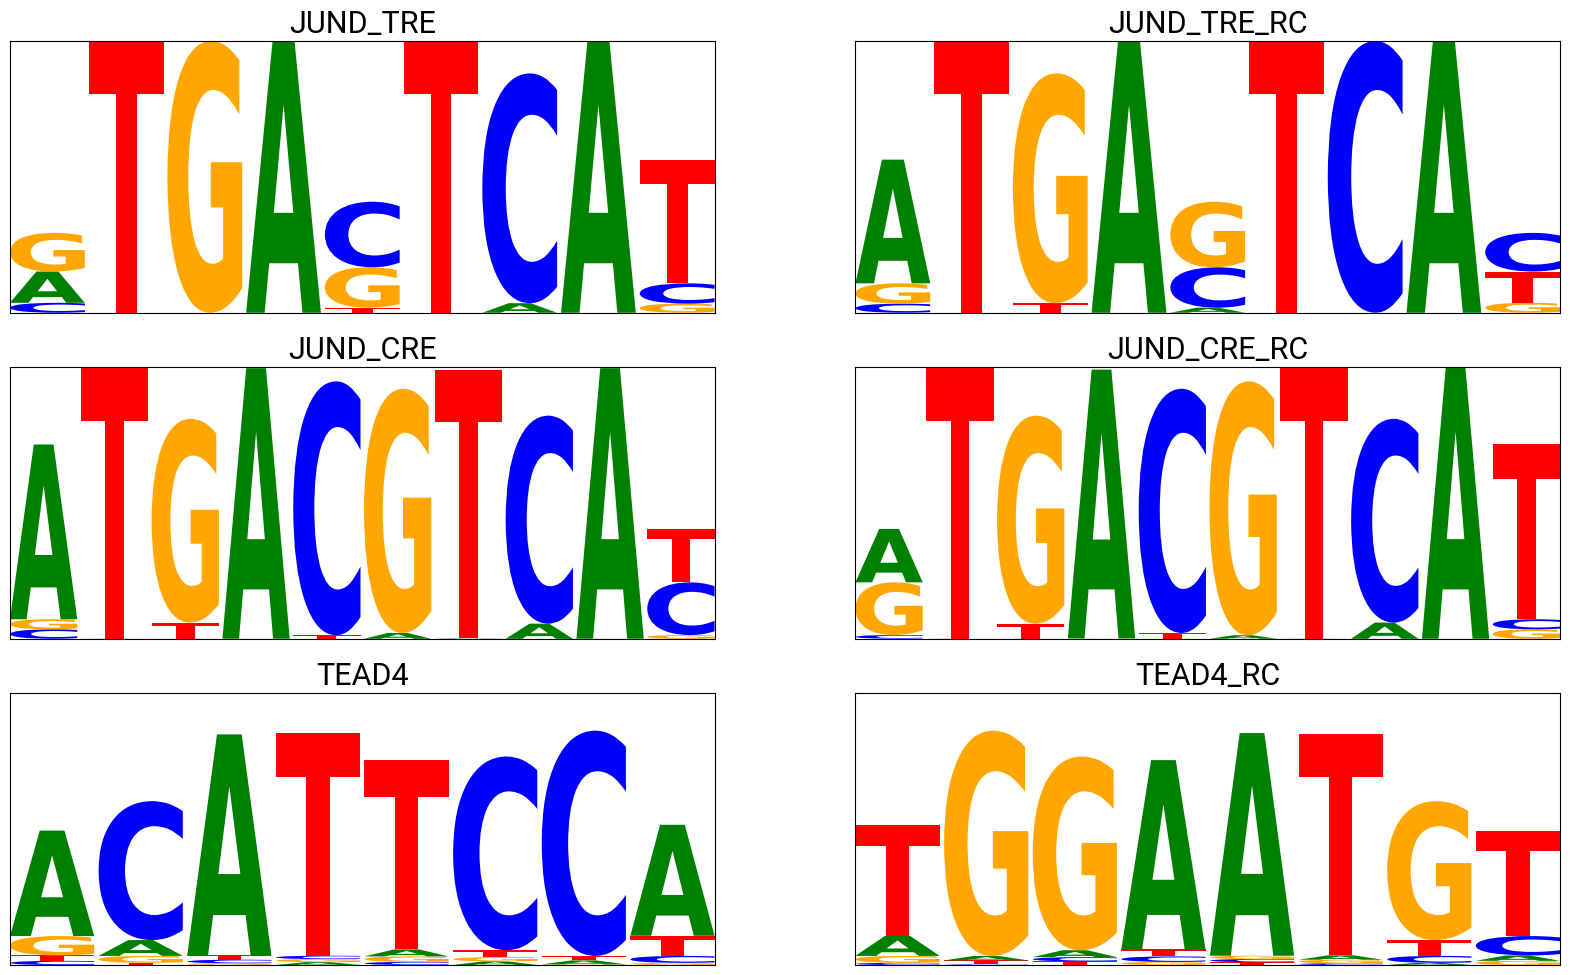

REST


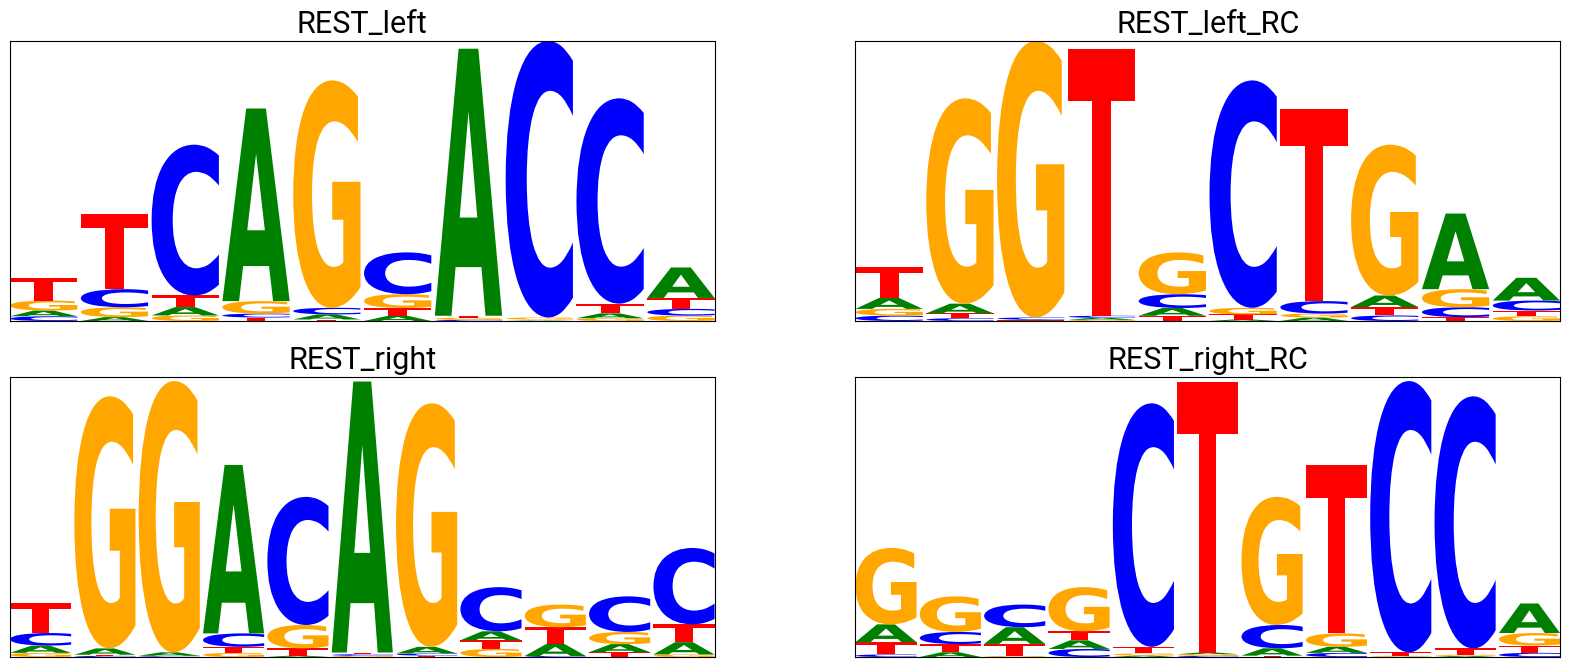

SPI1/CTCF


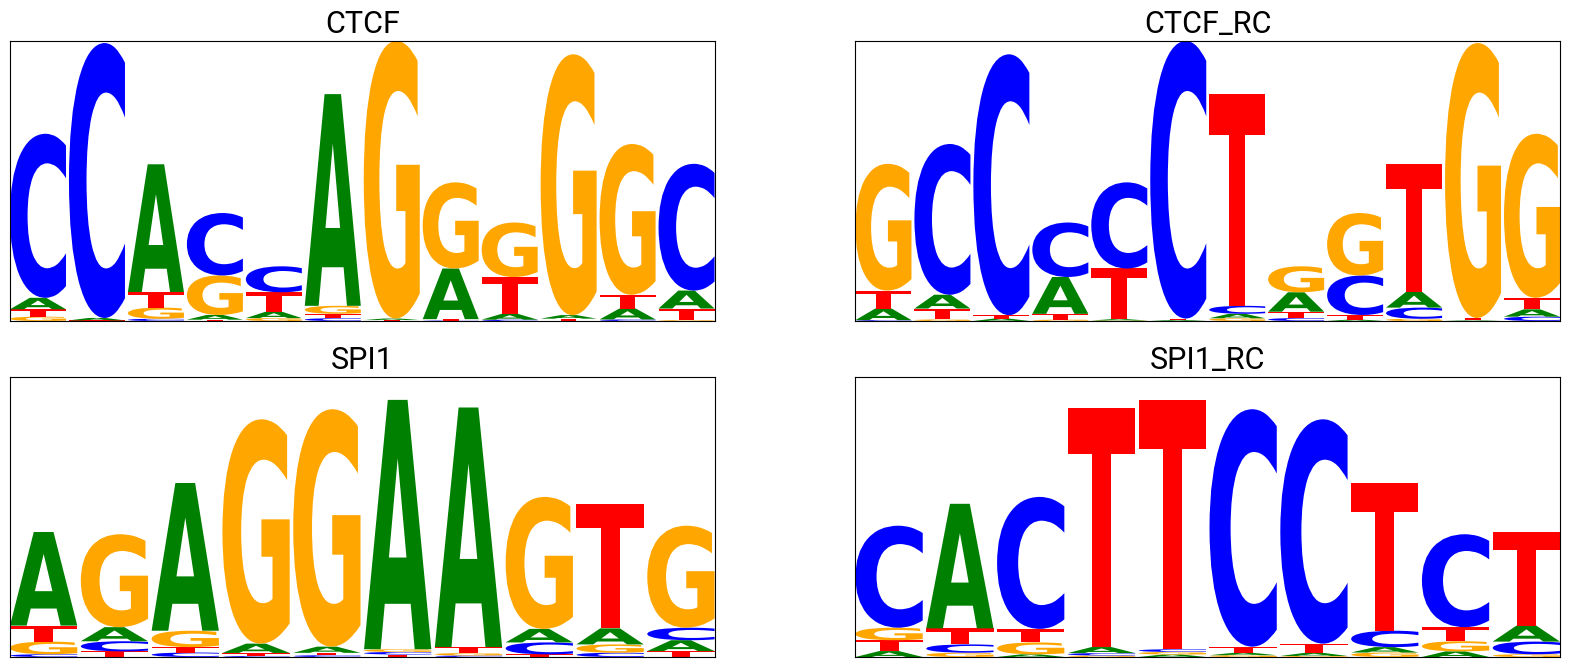

In [10]:
for dataset_key in datasets:
    print(dataset_key)
    motif_keys, pfms = zip(*true_pfms[dataset_key].items())
    fig = plot_motifs.plot_motif_grid(
        [pfm * motif_util.pfm_info_content(pfm)[:, None] for pfm in pfms],
        titles=motif_keys,
        show_x=False, show_y=False
    )
    fig.savefig(os.path.join(figures_out_path, datasets_sanit[dataset_key] + "_true_motifs.svg"), format="svg")
    plt.show()